### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
#En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

lista_tiendas = [tienda, tienda2, tienda3, tienda4]
resumen_ingresos = []

for i, df in enumerate(lista_tiendas):
    ingresos = df['Precio'].sum()
    costos_envio = df['Costo de envío'].sum()
    utilidad = ingresos - costos_envio

    resumen_ingresos.append({
        'Tienda': f'Tienda {i+1}',
        'Ingresos': ingresos,           #Suma ingresos
        'Costos de envío': costos_envio,#Suma costos de envio
        'Utilidad': utilidad            #Utilidad bruta
    })
#Muestra el DataFrame
df_ingresos = pd.DataFrame(resumen_ingresos)
print(df_ingresos.to_string(index=False))

  Tienda     Ingresos  Costos de envío     Utilidad
Tienda 1 1150880400.0       61377900.0 1089502500.0
Tienda 2 1116343500.0       59485100.0 1056858400.0
Tienda 3 1098019600.0       58516600.0 1039503000.0
Tienda 4 1038375700.0       55317400.0  983058300.0


Al analizar únicamente los ingresos y costos de envío, la Tienda 1 presenta la mayor utilidad bruta, mientras que la Tienda 4 muestra el margen más bajo.

# 2. Ventas por categoría

In [24]:
'''
En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos
por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.
'''
resumenes_categoria = []

for i, df in enumerate(lista_tiendas):
    nombre_tienda = f'Tienda {i+1}'
    print(f'\n==== {nombre_tienda} ====\n')

    resumen = df.groupby('Categoría del Producto').agg(
        Ventas=('Producto', 'count'), # Cantidad de ventas
    ).reset_index()

    # Muestra el DataFrame
    print(resumen.to_string(index=False))


==== Tienda 1 ====

 Categoría del Producto  Ventas
Artículos para el hogar     171
   Deportes y diversión     284
      Electrodomésticos     312
           Electrónicos     448
 Instrumentos musicales     182
               Juguetes     324
                 Libros     173
                Muebles     465

==== Tienda 2 ====

 Categoría del Producto  Ventas
Artículos para el hogar     181
   Deportes y diversión     275
      Electrodomésticos     305
           Electrónicos     422
 Instrumentos musicales     224
               Juguetes     313
                 Libros     197
                Muebles     442

==== Tienda 3 ====

 Categoría del Producto  Ventas
Artículos para el hogar     177
   Deportes y diversión     277
      Electrodomésticos     278
           Electrónicos     451
 Instrumentos musicales     177
               Juguetes     315
                 Libros     185
                Muebles     499

==== Tienda 4 ====

 Categoría del Producto  Ventas
Artículos para el ho

Al observar las categorías, en cada tienda varía el foco de ventas, pero en general, las categorías más vendidas Muebles, Electrónicos y Electrodomésticos concentran también los mayores ingresos.
En particular, la categoría más vendida en la Tienda 1 es Muebles, mientras que la menos vendida es Artículos para el hogar. Esta tendencia también se refleja en otras tiendas, lo que podría indicar un patrón de demanda.

# 3. Calificación promedio de la tienda


In [29]:
'''
En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda.
El objetivo es conocer la satisfacción del cliente con los productos vendidos.
'''
resumen_calificacion = []

for i, df in enumerate(lista_tiendas):
    nombre_tienda = f'Tienda {i+1}'
    print(f'\n==== {nombre_tienda} ====\n')

    # Promedio de calificación
    resumen_calificacion = df.groupby('Categoría del Producto').agg(calificacion=('Calificación', 'mean'),).reset_index()

    # Mostrar el DataFrame
    print(resumen_calificacion.to_string(index=False))


==== Tienda 1 ====

 Categoría del Producto  calificacion
Artículos para el hogar      3.748538
   Deportes y diversión      3.897887
      Electrodomésticos      4.032051
           Electrónicos      4.004464
 Instrumentos musicales      4.049451
               Juguetes      4.077160
                 Libros      3.976879
                Muebles      3.946237

==== Tienda 2 ====

 Categoría del Producto  calificacion
Artículos para el hogar      4.071823
   Deportes y diversión      4.065455
      Electrodomésticos      4.072131
           Electrónicos      3.971564
 Instrumentos musicales      4.035714
               Juguetes      4.025559
                 Libros      3.949239
                Muebles      4.092760

==== Tienda 3 ====

 Categoría del Producto  calificacion
Artículos para el hogar      4.073446
   Deportes y diversión      3.938628
      Electrodomésticos      4.010791
           Electrónicos      3.986696
 Instrumentos musicales      4.005650
               Juguetes  

Todas las tiendas se mantienen en un rango cercano a 4, lo que indica una percepción positiva y relativamente pareja por parte de los clientes. Esto sugiere que, por ahora, la calidad percibida de los productos no es un factor crítico para llegar a una conlusión.

# 4. Productos más y menos vendidos

In [6]:
'''
En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda.
Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.
'''
resumen_productos = []

for i, df in enumerate(lista_tiendas):
    nombre_tienda = f'Tienda {i+1}'
    print(f'\n==== {nombre_tienda} - Top 5 Productos Más Vendidos ====\n')

    resumen_productos = df.groupby('Producto').agg(
        Categoria=('Categoría del Producto', 'first'),
        Ventas=('Producto', 'count') # Cantidad de ventas
    ).reset_index()

    # Orden más vendidos
    top_5 = resumen_productos.sort_values(by='Ventas', ascending=False).head(5)

    print(top_5.to_string(index=False))

    print(f'\n==== {nombre_tienda} - Top 5 Productos Menos Vendidos ====\n')

    # Orden menos vendidos
    bottom_5 = resumen_productos.sort_values(by='Ventas', ascending=True).head(5)

    print(bottom_5.to_string(index=False))


==== Tienda 1 - Top 5 Productos Más Vendidos ====

        Producto         Categoria  Ventas
         Armario           Muebles      60
   TV LED UHD 4K      Electrónicos      60
      Microondas Electrodomésticos      60
Secadora de ropa Electrodomésticos      58
   Mesa de noche           Muebles      56

==== Tienda 1 - Top 5 Productos Menos Vendidos ====

                   Producto               Categoria  Ventas
  Auriculares con micrófono            Electrónicos      33
               Celular ABXY            Electrónicos      33
            Olla de presión Artículos para el hogar      35
                  Pandereta  Instrumentos musicales      36
Ciencia de datos con Python                  Libros      39

==== Tienda 2 - Top 5 Productos Más Vendidos ====

                 Producto              Categoria  Ventas
Iniciando en programación                 Libros      65
               Microondas      Electrodomésticos      62
                  Batería Instrumentos musicales     

General:
Cada tienda muestra un comportamiento distinto en cuanto a productos más vendidos, aunque se repiten ciertas categorías como Muebles, Electrodomésticos y Libros. Los productos menos vendidos tienden a concentrarse en categorías de menor rotación o más especializadas.

Tienda 1
Más vendidos: Predominan productos del hogar como Armario, TV LED 4K y Microondas, lo que indica una fuerte demanda en Muebles y Electrodomésticos (Categorías con mayor utilidad).

Menos vendidos: Productos como Auriculares con micrófono y Ciencia de datos con Python muestran baja rotación, sugiriendo menor interés por artículos tecnológicos y libros técnicos en esta tienda.

Tienda 2
Más vendidos: Iniciando en programación lidera, seguido por productos musicales como Batería y Guitarra acústica. La tienda tiene una alta demanda en Libros e Instrumentos musicales, lo que llama la atención, ya que en otras tiendas no son populares.

Menos vendidos: Productos de Juguetes, Muebles y tecnología tienen baja salida.

Tienda 3
Más vendidos: Los 5 productos principales están muy ligados a Muebles (Cama king, Mesa de comedor), lo que refleja un enfoque fuerte en equipamiento del hogar.

Menos vendidos: Artículos como Bloques de construcción o Vaso térmico tienen menor demanda, lo que sugiere que productos más pequeños o no esenciales rotan menos.

Tienda 4
Más vendidos: Mezcla de Muebles, Juguetes y Libros. La diversidad en las categorías indica una clientela más variada.

Menos vendidos: La baja venta de Guitarra eléctrica y Lavadora de ropa.

# 5. Envío promedio por tienda

In [7]:
promedio_envio = []

for i, df in enumerate(lista_tiendas):
    promedio = df['Costo de envío'].mean()

    promedio_envio.append({
        'Tienda': f'Tienda {i+1}',
        'Promedio Costo Envío': promedio
    })


df_promedio_envio = pd.DataFrame(promedio_envio)

df_promedio_envio['Promedio Costo Envío'] = df_promedio_envio['Promedio Costo Envío'].apply(
    lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
)
# Mostrar el DataFrame
print(df_promedio_envio.to_string(index=False))


  Tienda Promedio Costo Envío
Tienda 1            26.018,61
Tienda 2            25.216,24
Tienda 3            24.805,68
Tienda 4            23.459,46


Tienda 1 tiene el promedio de envío más alto, superando por más de $2.500 al de Tienda 4. Esto podría deberse a factores como mayor numero de ventas, mayor volumen o peso promedio por pedido, ubicación geográfica más costosa para despachos.



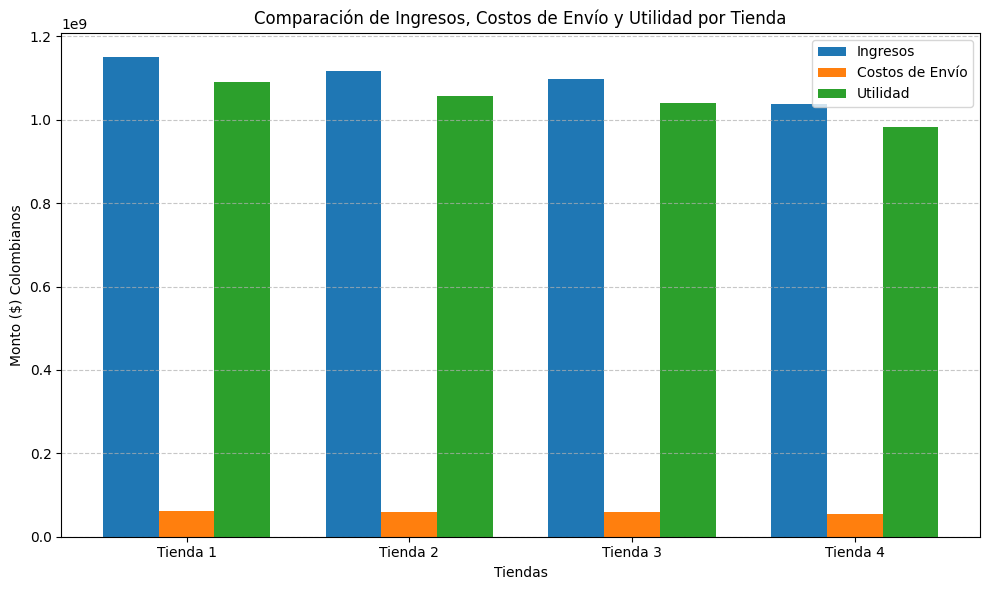

In [12]:
import numpy as np
import matplotlib.pyplot as plt


df_ingresos = pd.DataFrame(resumen_ingresos)

# Datos grafico
tiendas = df_ingresos['Tienda']
ingresos = df_ingresos['Ingresos']
costos = df_ingresos['Costos de envío']
utilidades = df_ingresos['Utilidad']

# Configuración grafico
x = np.arange(len(tiendas))  # posiciones en el eje X
ancho = 0.25  # ancho de cada barra

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.bar(x - ancho, ingresos, width=ancho, label='Ingresos')
plt.bar(x, costos, width=ancho, label='Costos de Envío')
plt.bar(x + ancho, utilidades, width=ancho, label='Utilidad')

# Etiquetas y título
plt.xlabel('Tiendas')
plt.ylabel('Monto ($) Colombianos')
plt.title('Comparación de Ingresos, Costos de Envío y Utilidad por Tienda')
plt.xticks(x, tiendas)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar gráfico
plt.show()

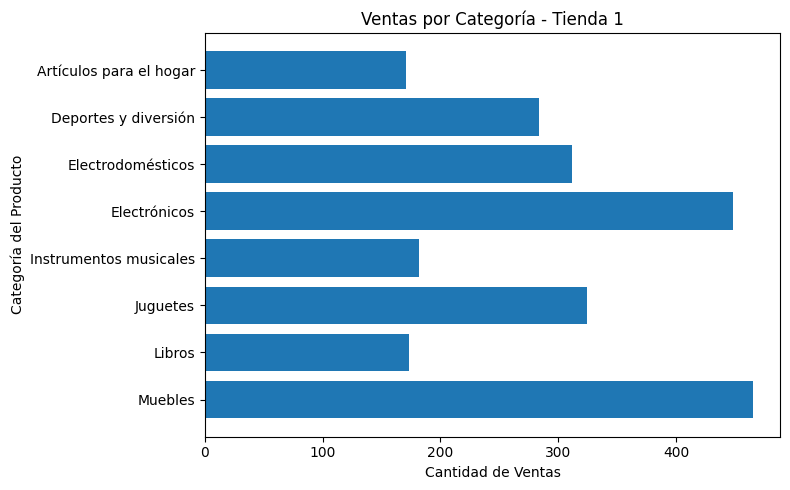

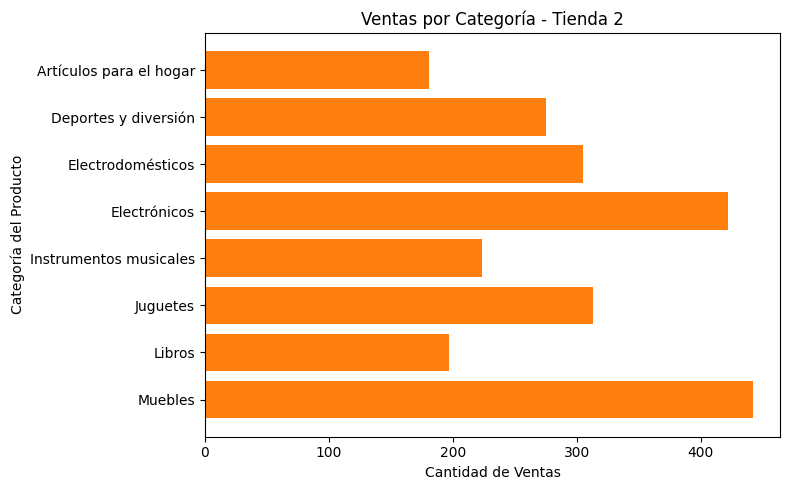

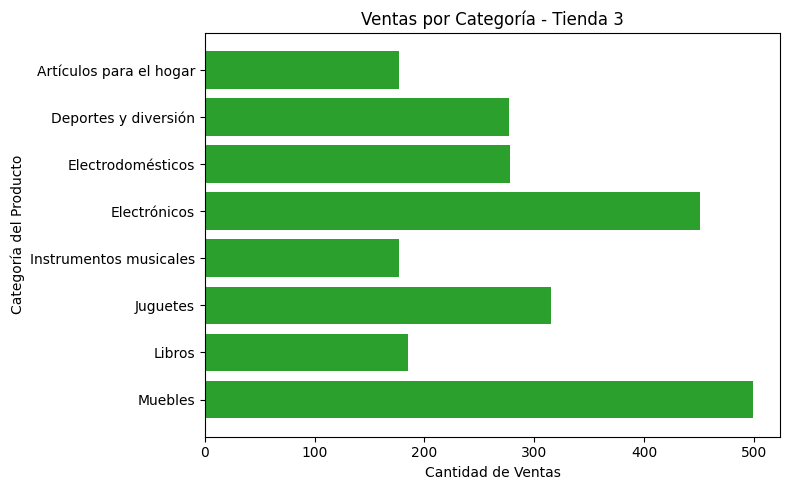

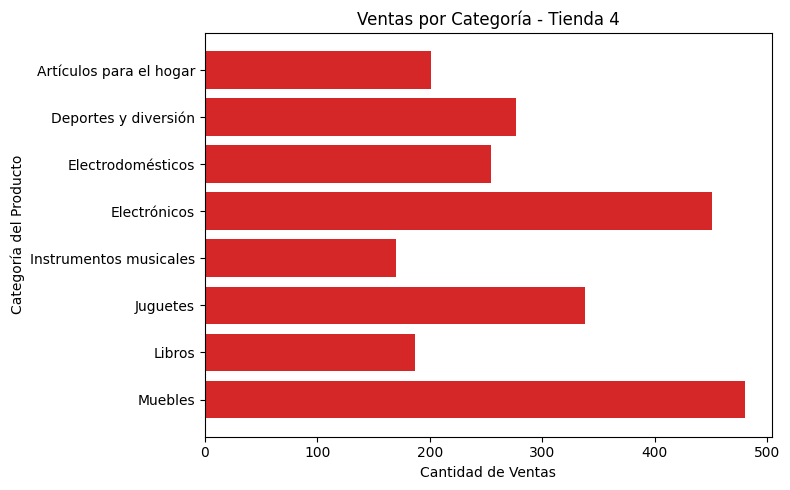

In [28]:
import matplotlib.pyplot as plt

# Lista de colores
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, df in enumerate(lista_tiendas):
    nombre_tienda = f'Tienda {i+1}'
    resumen = df.groupby('Categoría del Producto').agg(
        Ventas=('Producto', 'count'),
    ).reset_index()

    # Crear gráfico
    plt.figure(figsize=(8, 5))
    plt.barh(resumen['Categoría del Producto'], resumen['Ventas'], color=colores[i % len(colores)])
    plt.xlabel('Cantidad de Ventas')
    plt.ylabel('Categoría del Producto')
    plt.title(f'Ventas por Categoría - {nombre_tienda}')
    plt.gca().invert_yaxis()  # Orden
    plt.tight_layout()
    plt.show()

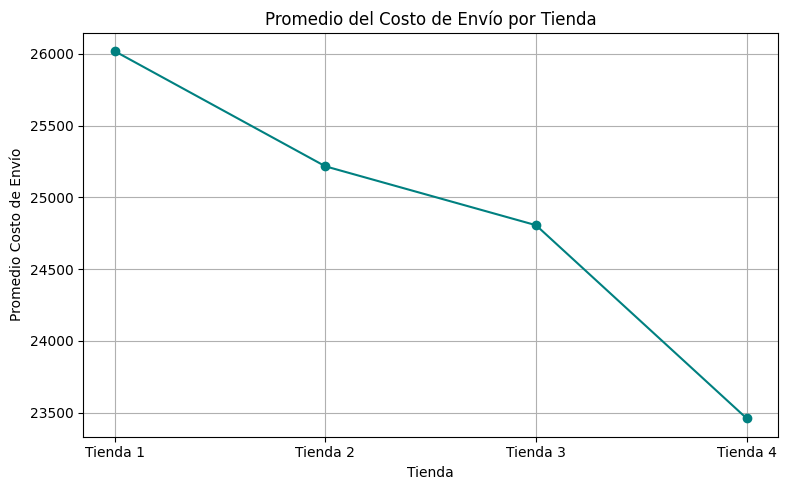

In [31]:
import matplotlib.pyplot as plt

promedio_envio = []

for i, df in enumerate(lista_tiendas):
    promedio = df['Costo de envío'].mean()

    promedio_envio.append({
        'Tienda': f'Tienda {i+1}',
        'Promedio Costo Envío': promedio
    })

df_promedio_envio = pd.DataFrame(promedio_envio)

# Graficar promedio
plt.figure(figsize=(8, 5))

# Gráfico de líneas
plt.plot(df_promedio_envio['Tienda'], df_promedio_envio['Promedio Costo Envío'],
         marker='o', linestyle='-', color='teal')

# Título y etiquetas
plt.title('Promedio del Costo de Envío por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Promedio Costo de Envío')

plt.grid(True)

plt.tight_layout()
plt.show()

#**Introducción**

El objetivo de este análisis es determinar cuál de las cuatro tiendas del Sr. Juan presenta el desempeño más bajo, considerando datos como ingresos, utilidades, calificaciones de clientes, productos más vendidos y costos de envío.

##**Desarrollo**

###**Ingresos y Utilidad Total**

Tienda 1 genera la mayor utilidad, mientras que Tienda 4 tiene los ingresos y utilidades más bajos.

###**Categorías más vendidas**

Las categorías de mayor rotación son similares en todas las tiendas, pero Tienda 4 presenta menor volumen de ventas en productos mas rentables en comparación a las demas tiendas.

###**Productos más y menos vendidos**

Tienda 4 tiene una notoria cantidad de productos con bajas ventas, a diferencia del resto, donde los productos más vendidos están mejor distribuidos entre productos mas rentables.

###**Costo Promedio de Envío**

Tienda 4, si bien tiene el menor costo promedio por envío ($23.459), no logra compensar su bajo rendimiento general.

###**Conclusión**

Se recomienda vender Tienda 4, ya que presenta consistentemente el peor desempeño:

*   Menores ingresos y utilidades.
*   Menor rotación de productos y categorías.

Concentrarse en las otras tres tiendas permitirá al Sr. Juan optimizar recursos y mejorar la rentabilidad general del negocio.